# SQLAlchemy Challenge
--- 
**Brief Description**: This notebook uses Python and SQLAlchemy to do a basic climate analysis and data exploration of a climate database that has temperature metrics for various stations in Hawaii. Specifically, this notebook uses SQLAlchemy ORM queries, Pandas and Matplotlib.  
***
> - **Precipitation Analysis:** Perform a precipitation analysis based on the below mentioned steps: <br>
       1. Find the *most recent date* in the dataset.<br>
       2. Using that date, get the previous 12 months of precipitation data by querying the previous 12 months of data.<br>
       3. Select only the *date* and *prcp* values.<br>
       4. Load the query results into a Pandas DataFrame. Explicitly set the column names.<br>
       5. Sort the DataFrame values by *date*.<br>
       6. Plot the results by using the DataFrame *plot method*.<br>
       7. Use Pandas to print the summary statistics for the precipitation data.<br>
       
> - **Station Analysis:** Perform an analysis of all the stations in the dataset based on the following steps: <br>
       1. Design a query to calculate the total number of stations in the dataset.<br> 
       2. Design a query to find the most-active stations (that is, the stations that have the *most rows*).<br>
       3. Calculates the lowest, highest and average temperatures of the most-active station per the previous query.<br>
       4. Design a query to get the previous 12 months of temperature observation (TOBS) data.<br>
       5. Close the session.<br>
***

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# Create a reference to the file
hawaii_database_path = ("../Resources/hawaii.sqlite")

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

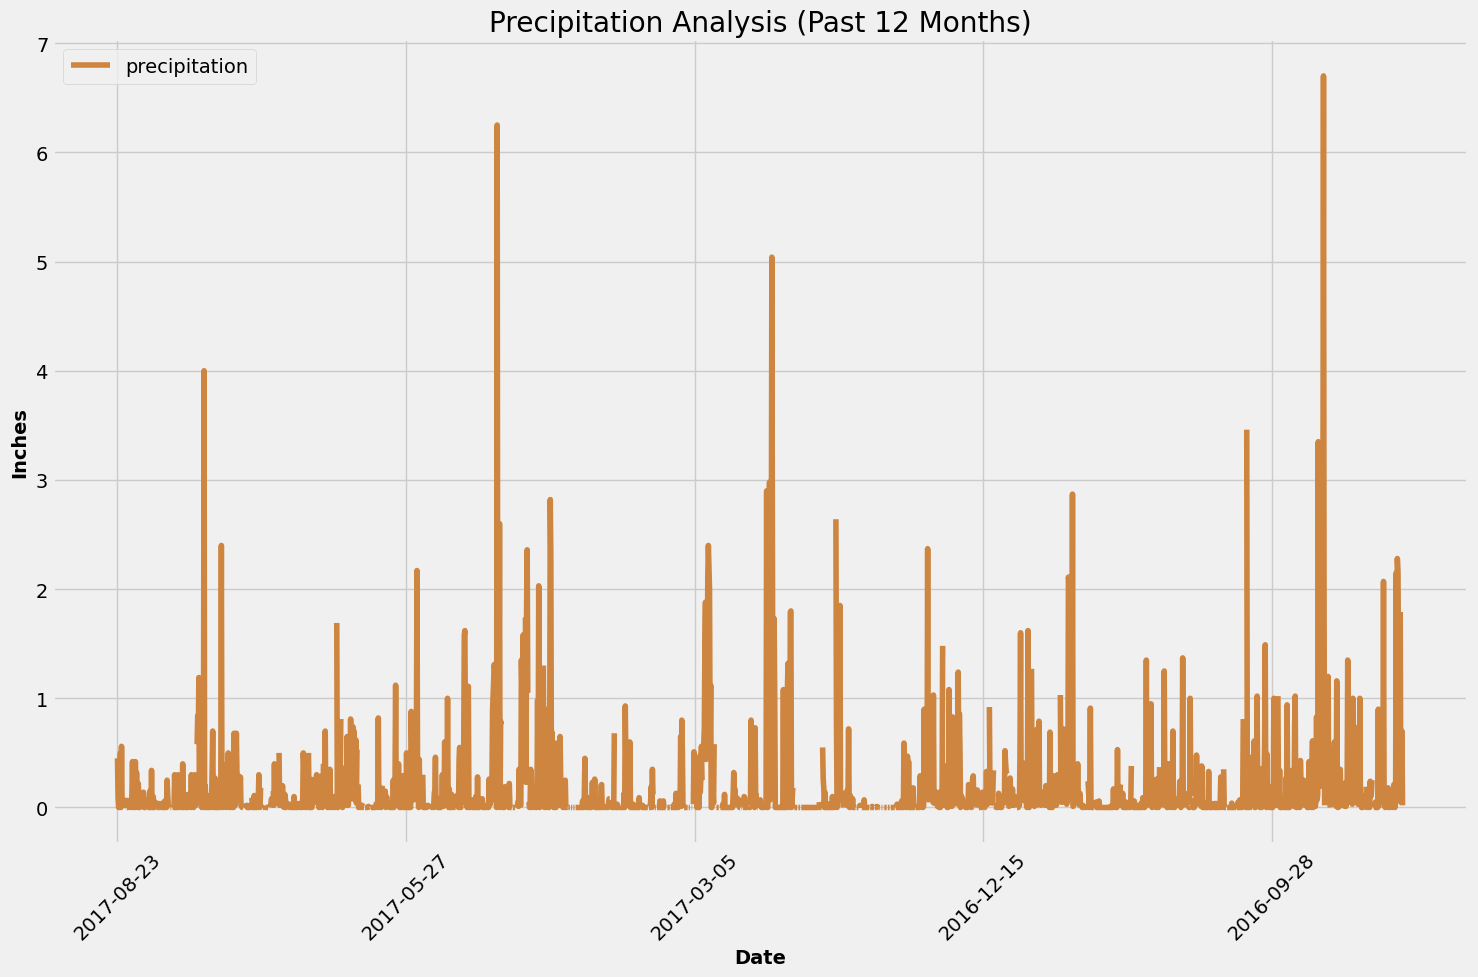

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)                                                   
                                                
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_data_df = pd.DataFrame(prcp_data, columns=["date", "precipitation"])
prcp_data_df.set_index(prcp_data_df["date"], inplace=True)

# Sort the dataframe by date
prcp_data_df = prcp_data_df.sort_index(ascending=False)

# Use Pandas Plotting with Matplotlib to plot the data - apply relevant formating
prcp_data_df.plot(title="Precipitation Analysis (Past 12 Months)", fontsize = 14, rot = 45, color = 'peru', x_compat = True, figsize = (15 , 10))
plt.xlabel('Date', fontweight = 'bold', fontsize = 14)
plt.ylabel('Inches', labelpad = 5, fontweight = 'bold', fontsize = 14)
plt.tight_layout()

In [30]:
# Use Pandas to calculate the summary statistics for the precipitation data - round the values to two decimal places
prcp_data_df.describe().round(2)

,precipitation
count,2021.00
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).all()
station_count

[(9,)]

In [40]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Assign the most active station to an explicit variable for future reference
most_active_station = (active_stations[0][0])

# List the stations based on the query above
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_temp_metrics = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs).filter(Measurement.station == most_active_station)).all()

# Apply formating to each element of the list to round the values to two decimal places
formatted_list = ['%.2f' % elem for elem in most_active_station_temp_metrics[0]]

# Print the formatted list with the desired temperature values
formatted_list

['53.00', '87.00', '71.66']

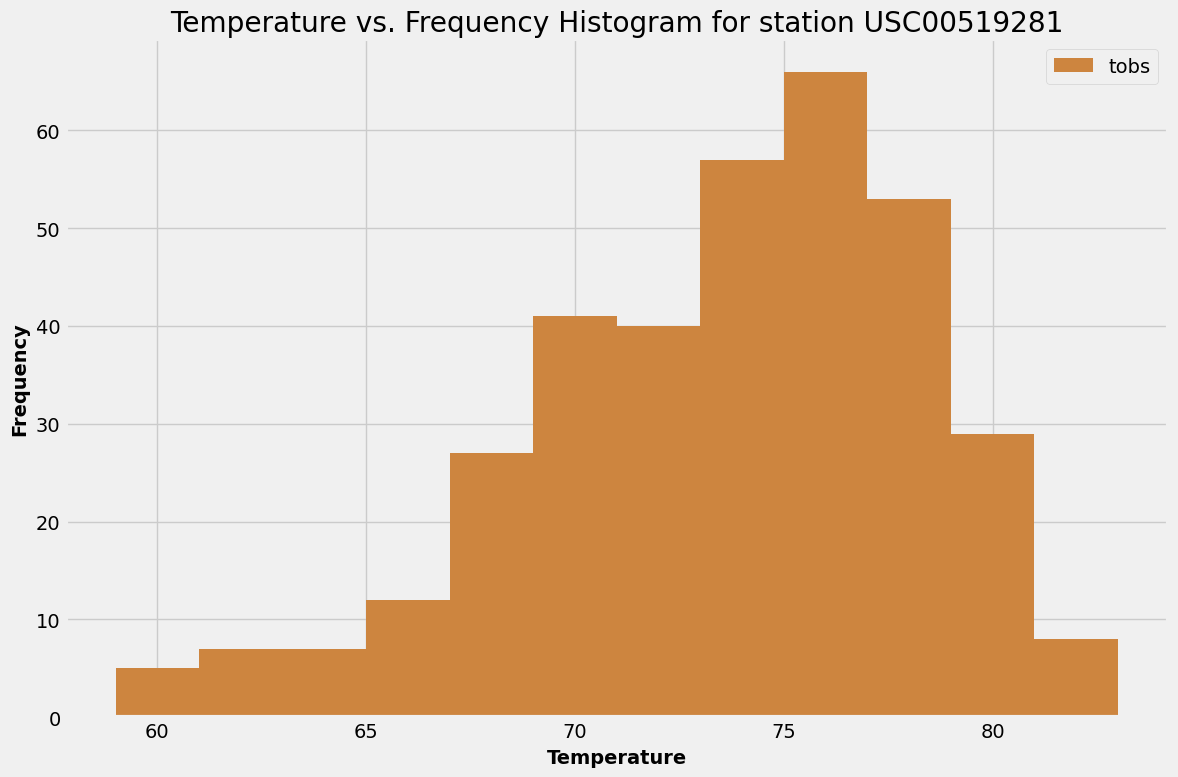

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Temparature_observation = session.query(Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date >= last_year_date).all()
Temparature_observation_df = pd.DataFrame(Temparature_observation, columns=["tobs"])
Temparature_observation_df.plot.hist(bins = 12, title = "Temperature vs. Frequency Histogram for station " + most_active_station, color = 'peru', figsize=(12,8))
plt.xlabel('Temperature', fontweight = 'bold', labelpad = 5, fontsize=14)
plt.ylabel('Frequency', fontweight = 'bold', labelpad = 5, fontsize=14)
plt.tight_layout()

# Close Session

In [38]:
# Close Session
session.close()